In [3]:
!pip install pysam

     |████████████████████████████████| 14.9 MB 3.5 MB/s 


In [27]:
from pysam import VariantFile
import numpy as np
from sklearn import decomposition
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
VCF_FILENAME = "../ALL.chr22.phase1_release_v3.20101123.snps_indels_svs.genotypes.vcf.gz"
PANEL_FILENAME = "../phase1_integrated_calls.20101123.ALL.panel"


genotypes = []
samples = []
variant_ids = []

with VariantFile(VCF_FILENAME) as vcf_reader:
  counter = 0
  for record in vcf_reader:
    counter += 1
    #show every other 100 SNPs
    if counter % 100 == 0:
      alleles = [record.samples[x].allele_indices for x in record.samples] 
      samples = [sample for sample in record.samples]
      genotypes.append(alleles)
      variant_ids.append(record.id)
    if counter % 4943 == 0: #494328 total rows, every 1%
      print(counter)
      print(f"{round(100 * counter / 494328)}%")
    
with open(PANEL_FILENAME) as panel_file:
  labels = {} # {sample id: population code}
  for line in panel_file:
    line = line.strip().split("\t")
    labels[line[0]] = line[1]

print(labels)

# genotypes = np.array(genotypes)
# print(genotypes.shape) 
    

4943
1%
9886
2%
14829
3%
19772
4%
24715
5%
29658
6%
34601
7%
39544
8%
44487
9%
49430
10%
54373
11%
59316
12%
64259
13%
69202
14%
74145
15%
79088
16%
84031
17%
88974
18%
93917
19%
98860
20%
103803
21%
108746
22%
113689
23%
118632
24%
123575
25%
128518
26%
133461
27%
138404
28%
143347
29%
148290
30%
153233
31%
158176
32%
163119
33%
168062
34%
173005
35%
177948
36%
182891
37%
187834
38%
192777
39%
197720
40%
202663
41%
207606
42%
212549
43%
217492
44%
222435
45%
227378
46%
232321
47%
237264
48%
242207
49%
247150
50%
252093
51%
257036
52%
261979
53%
266922
54%
271865
55%
276808
56%
281751
57%
286694
58%
291637
59%
296580
60%
301523
61%
306466
62%
311409
63%
316352
64%
321295
65%
326238
66%
331181
67%
336124
68%
341067
69%
346010
70%
350953
71%
355896
72%
360839
73%
365782
74%
370725
75%
375668
76%
380611
77%
385554
78%
390497
79%
395440
80%
400383
81%
405326
82%
410269
83%
415212
84%
420155
85%
425098
86%
430041
87%
434984
88%
439927
89%
444870
90%
449813
91%
454756
92%
459699
93%
464642
9

In [39]:

#remove alleles column
matrix = np.count_nonzero(genotypes, axis=2)
print(matrix.shape)

(4943, 1092)


In [40]:
pca = decomposition.PCA(n_components=2)
pca.fit(matrix)
print(pca.singular_values_)
to_plot = pca.transform(matrix)
print(to_plot.shape)

[825.28198756 186.97937342]
(4943, 2)


In [41]:
#PCA was performed on SNPs, not on samples -> transpose matrix
matrix = matrix.T
pca = decomposition.PCA(n_components=2)
pca.fit(matrix)
print(pca.singular_values_)
to_plot = pca.transform(matrix)
print(to_plot.shape)

[188.93732058 152.99536559]
(1092, 2)


In [70]:
df = pd.DataFrame(matrix, columns=variant_ids, index=samples)

In [71]:
df["Population code"] = df.index.map(labels)

In [72]:
df

,rs144366698,rs200391621,rs78888200,rs200049935,rs182808734,rs147783986,rs202082800,rs185745570,rs151231161,rs191445992,rs192467387,rs117873986,rs131556,rs12158807,rs147991245,rs191939299,rs182384033,rs183445157,rs188681520,rs193079751,rs140483857,rs188051002,rs118158488,rs187221516,rs184340529,rs138404631,rs11089243,rs188019254,rs141440063,NaN,rs7288876,rs117357846,rs9606008,rs147196557,rs146805961,rs2096539,rs183421549,rs8142777,rs188283983,rs185168171,...,rs6010135,rs201381452,rs113802488,rs7284426,rs9616866,rs77135372,rs138079423,rs11913340,rs144175669,rs9628215,rs141837905,rs963980,rs145479865,rs189949730,rs139026351,rs112222696,rs76038028,rs6151414,rs115513093,rs188724627,rs183947955,rs113971957,rs140536695,rs191553223,rs140214489,rs114849024,rs114294635,rs144474945,rs150111605,rs147260888,rs6010062,rs186386126,rs73174436,rs6010073,rs181024981,rs180882000,rs147614277,rs192355741,rs191731586,Population code
HG00096,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,GBR
HG00097,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,GBR
HG00099,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,1,0,0,GBR
HG00100,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,GBR
HG00101,0,0,1,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA20816,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,TSI
NA20818,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,TSI
NA20819,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,TSI
NA20826,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,TSI


In [73]:
df.reset_index(level=0, inplace=True)

In [74]:
df.rename(columns={"index": "Sample"}, inplace=True)

In [75]:
df

,Sample,rs144366698,rs200391621,rs78888200,rs200049935,rs182808734,rs147783986,rs202082800,rs185745570,rs151231161,rs191445992,rs192467387,rs117873986,rs131556,rs12158807,rs147991245,rs191939299,rs182384033,rs183445157,rs188681520,rs193079751,rs140483857,rs188051002,rs118158488,rs187221516,rs184340529,rs138404631,rs11089243,rs188019254,rs141440063,NaN,rs7288876,rs117357846,rs9606008,rs147196557,rs146805961,rs2096539,rs183421549,rs8142777,rs188283983,...,rs6010135,rs201381452,rs113802488,rs7284426,rs9616866,rs77135372,rs138079423,rs11913340,rs144175669,rs9628215,rs141837905,rs963980,rs145479865,rs189949730,rs139026351,rs112222696,rs76038028,rs6151414,rs115513093,rs188724627,rs183947955,rs113971957,rs140536695,rs191553223,rs140214489,rs114849024,rs114294635,rs144474945,rs150111605,rs147260888,rs6010062,rs186386126,rs73174436,rs6010073,rs181024981,rs180882000,rs147614277,rs192355741,rs191731586,Population code
0,HG00096,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,GBR
1,HG00097,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,GBR
2,HG00099,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,1,0,0,GBR
3,HG00100,0,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,GBR
4,HG00101,0,0,1,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,NA20816,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,TSI
1088,NA20818,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,TSI
1089,NA20819,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,TSI
1090,NA20826,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,TSI


In [76]:
non_spns = ["Population code", "Sample"]

In [77]:
df_snps = df.drop(non_spns, axis = 1)
matrix = df_snps.to_numpy()
print(matrix.shape)
matrix

(1092, 4943)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [78]:
pca = decomposition.PCA(n_components=2)
pca.fit(matrix)

PCA(n_components=2)

In [79]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.08253525 0.05412034]
[188.93732058 152.99536559]


In [80]:
to_plot = pca.transform(matrix)
to_plot.shape
to_plot

array([[ 0.31282717,  5.35434926],
       [-0.67940259,  6.18332942],
       [-0.42071017,  5.26671964],
       ...,
       [ 0.20043966,  4.43755038],
       [ 0.11973266,  4.95993686],
       [-0.28688807,  3.46617333]])

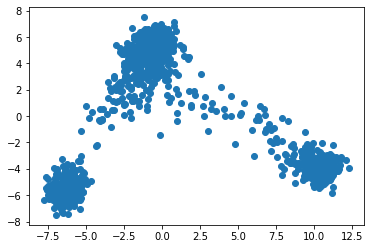

In [81]:
plt.scatter(x=to_plot[:,0], y=to_plot[:,1])

In [82]:
import altair as alt

In [83]:
df_plot = df[non_spns].copy()

In [84]:
df_plot

,Population code,Sample
0,GBR,HG00096
1,GBR,HG00097
2,GBR,HG00099
3,GBR,HG00100
4,GBR,HG00101
...,...,...
1087,TSI,NA20816
1088,TSI,NA20818
1089,TSI,NA20819
1090,TSI,NA20826


In [85]:
df_plot["PC1"] = to_plot[:, 0]
df_plot["PC2"] = to_plot[:, 1]
df_plot

,Population code,Sample,PC1,PC2
0,GBR,HG00096,0.312827,5.354349
1,GBR,HG00097,-0.679403,6.183329
2,GBR,HG00099,-0.420710,5.266720
3,GBR,HG00100,-0.805419,5.965095
4,GBR,HG00101,-0.771385,4.332076
...,...,...,...,...
1087,TSI,NA20816,0.647431,5.090230
1088,TSI,NA20818,-1.226520,6.273754
1089,TSI,NA20819,0.200440,4.437550
1090,TSI,NA20826,0.119733,4.959937


In [88]:
alt.Chart(df_plot).mark_point().encode(
    x = "PC1",
    y = "PC2",
    color = alt.Color("Population code", scale = alt.Scale(scheme="category20"))
)

alt.Chart(...)

In [90]:
pop = pd.read_csv("/content/drive/MyDrive/Bioinformática/#Bioinformática/PCA_ON_GENOTYPES/igsr_populations.tsv", sep = "\t")

In [91]:
pop

,Population code,Population elastic ID,Population name,Population description,Population latitude,Population longitude,Superpopulation code,Superpopulation name,Superpopulation display colour,Superpopulation display order,Number of samples,Data collections
0,CHS,CHS,Southern Han Chinese,Han Chinese South,23.133330,113.266667,EAS,East Asian Ancestry,#778500,3,171,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1,FIN,FIN,Finnish,Finnish in Finland,60.170000,24.930000,EUR,European Ancestry,#018ead,4,105,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2,PUR,PUR,Puerto Rican,Puerto Rican in Puerto Rico,18.400000,-66.100000,AMR,American Ancestry,#710027,2,150,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
3,KHV,KHV,Kinh Vietnamese,"Kinh in Ho Chi Minh City, Vietnam",10.780000,106.680000,EAS,East Asian Ancestry,#778500,3,124,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
4,ACB,ACB,African Caribbean,African Caribbean in Barbados,13.100000,-59.620000,AFR,African Ancestry,#ffd845,1,123,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
...,...,...,...,...,...,...,...,...,...,...,...,...
207,NaN,EstonianSGDP,Estonian,Estonian in Estonia (SGDP),58.500000,24.900000,NaN,West Eurasia (SGDP),#001f54,19,2,Simons Genome Diversity Project
208,NaN,SardinianSGDP,Sardinian,Sardinian in Italy (SGDP),40.000000,9.000000,NaN,West Eurasia (SGDP),#001f54,19,3,Simons Genome Diversity Project
209,NaN,DinkaSGDP,Dinka,Dinka in Sudan (SGDP),8.794444,27.400000,NaN,Africa (SGDP),#12eeff,13,3,Simons Genome Diversity Project
210,NaN,NaxiSGDP,Naxi,Naxi in China (SGDP),26.000000,100.000000,NaN,East Asia (SGDP),#ff48de,16,3,Simons Genome Diversity Project


In [95]:
df_plot = df_plot.merge(pop, on="Population code", how="inner")

In [96]:
df_plot

,Population code,Sample,PC1,PC2,Population elastic ID,Population name,Population description,Population latitude,Population longitude,Superpopulation code,Superpopulation name,Superpopulation display colour,Superpopulation display order,Number of samples,Data collections
0,GBR,HG00096,0.312827,5.354349,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,107,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1,GBR,HG00097,-0.679403,6.183329,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,107,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2,GBR,HG00099,-0.420710,5.266720,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,107,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
3,GBR,HG00100,-0.805419,5.965095,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,107,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
4,GBR,HG00101,-0.771385,4.332076,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,107,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,TSI,NA20816,0.647431,5.090230,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,112,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1088,TSI,NA20818,-1.226520,6.273754,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,112,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1089,TSI,NA20819,0.200440,4.437550,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,112,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1090,TSI,NA20826,0.119733,4.959937,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,112,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."


In [98]:
alt.Chart(df_plot).mark_point().encode(
    x = "PC1",
    y = "PC2",
    color = alt.Color("Superpopulation name", scale = alt.Scale(scheme="category20")),
    fill = "Population code"
)

alt.Chart(...)

In [99]:
from sklearn.manifold import TSNE

In [100]:
x = matrix
x_embedded = TSNE(n_components=2, learning_rate="auto",
                  init="random").fit_transform(x)

x_embedded.shape

(1092, 2)

In [101]:
df_plot["tsne1"] = x_embedded[:,0]
df_plot["tsne2"] = x_embedded[:,1]

In [102]:
df_plot

,Population code,Sample,PC1,PC2,Population elastic ID,Population name,Population description,Population latitude,Population longitude,Superpopulation code,Superpopulation name,Superpopulation display colour,Superpopulation display order,Number of samples,Data collections,tsne1,tsne2
0,GBR,HG00096,0.312827,5.354349,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,107,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-10.228872,15.191318
1,GBR,HG00097,-0.679403,6.183329,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,107,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-3.725081,9.739493
2,GBR,HG00099,-0.420710,5.266720,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,107,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-6.815399,2.779105
3,GBR,HG00100,-0.805419,5.965095,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,107,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-2.858915,13.065057
4,GBR,HG00101,-0.771385,4.332076,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,107,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-7.237104,9.422847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,TSI,NA20816,0.647431,5.090230,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,112,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-0.501871,8.633383
1088,TSI,NA20818,-1.226520,6.273754,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,112,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-4.863452,10.710942
1089,TSI,NA20819,0.200440,4.437550,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,112,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",-1.782570,13.618867
1090,TSI,NA20826,0.119733,4.959937,TSI,Toscani,Toscani in Italy,42.100000,12.000000,EUR,European Ancestry,#018ead,4,112,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",2.128158,11.266932


In [103]:
alt.Chart(df_plot).mark_point().encode(
    x = "tsne1",
    y = "tsne2",
    color = alt.Color("Superpopulation name", scale = alt.Scale(scheme="category20")),
)

alt.Chart(...)

In [ ]:
# references

# https://www.youtube.com/watch?v=-PCKK_nwFdA&t=2691s